In [314]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [315]:
def f(x,y):
    return x+2*y

In [316]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4

In [317]:
N = 200
t = np.linspace(0,50,N)
h = t[1] - t[0]

In [318]:
yext = Solucion(t)

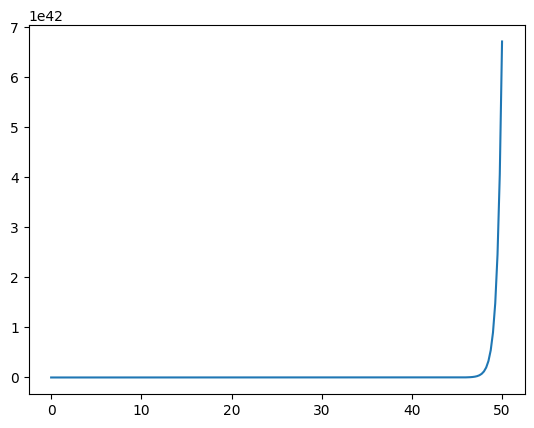

In [319]:
plt.plot(t,yext)

In [320]:
def GetRungeKutta2(x,y,h):
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h,y[i-1]+h*k1)

        y[i] = y[i-1] + h/2*(k1+k2)
    

In [321]:
def GetRungeKutta3(x,y,h):
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h/2,y[i-1]+h/2*k1)
        k3 = f(x[i-1]+h,y[i-1]-h*k1+2*h*k2)

        y[i] = y[i-1] + h/6*(k1+4*k2+k3)

In [322]:
def GetRungeKutta4(x,y,h):
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h/2,y[i-1]+h/2*k1)
        k3 = f(x[i-1]+h/2,y[i-1]+h/2*k2)
        k4 = f(x[i-1]+h,y[i-1]+h*k3)

        y[i] = y[i-1] + h/6*(k1+2*k2+2*k3+k4)

In [323]:
y2 = np.zeros_like(t)
y2[0] = 0.
y3 = np.zeros_like(t)
y3[0] = 0.
y4 = np.zeros_like(t)
y4[0] = 0.

In [324]:
GetRungeKutta2(t,y2,h)
GetRungeKutta3(t,y3,h)
GetRungeKutta4(t,y4,h)

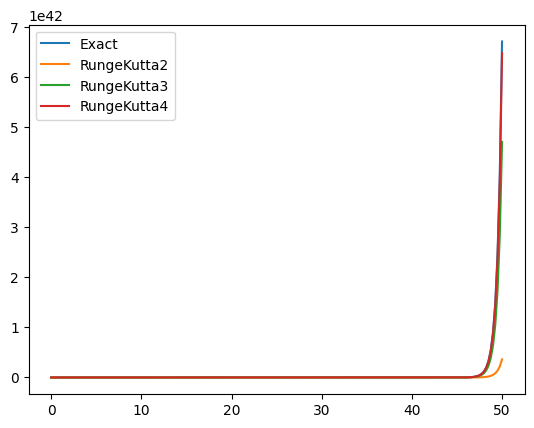

In [325]:
plt.plot(t,yext, label='Exact')
plt.plot(t,y2,label='RungeKutta2')
plt.plot(t,y3,label='RungeKutta3')
plt.plot(t,y4,label='RungeKutta4')
plt.legend()

En la anterior grafica podemos ver como se ajustan RungeKutta 2,3 y 4. A la función exacta. A primera vista parece que RungeKutta 2 no es muy estable y se separa de la solución exacta rapidamente. Minetras que RungeKutta 3 y 4 son más estables.

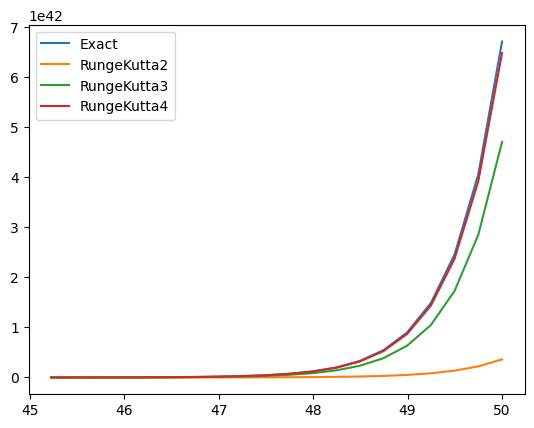

In [326]:
plt.plot(t[int(len(t)*0.9):], yext[int(len(t)*0.9):], label='Exact')
plt.plot(t[int(len(t)*0.9):], y2[int(len(t)*0.9):], label='RungeKutta2')
plt.plot(t[int(len(t)*0.9):], y3[int(len(t)*0.9):], label='RungeKutta3')
plt.plot(t[int(len(t)*0.9):], y4[int(len(t)*0.9):], label='RungeKutta4')
plt.legend()

Aquí seleccionamos solo una porción de la grafica para ver más precisamente como se comportan los diferentes grados de RungeKutta. Aquí podemos ver que RungeKutta2 definitivamente no es muy estable, pero que RungeKutta 4 es bastante estable y tiende de manera muy precisa a la solución exacta.

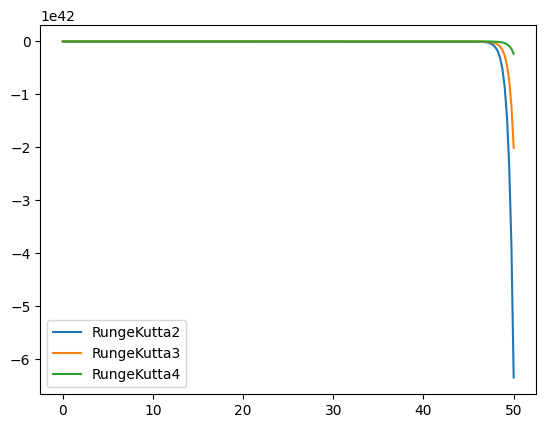

In [327]:
plt.subplot(1,1,1)
y2 -= yext
y3 -= yext
y4 -= yext
#plt.plot(t,yext-yext,label='Exacta')
plt.plot(t,y2,label='RungeKutta2')
plt.plot(t,y3,label='RungeKutta3')
plt.plot(t,y4,label='RungeKutta4')
plt.legend()
plt.show()

Aquí vemos cómo se comporta el error de los diferentes grados de RungeKutta. De aquí podemos ver como RungeKutta 4 tiene un error que crece mucho más lento que el resto, pero es evidente que tiene un pequeño error comparado a la solución exacta.

In [328]:
def fc(z):
    return 1j*z

In [329]:
def ComplexEuler2():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    
    f += 0.5*h_*(k1+k2)

In [330]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion2 = np.array([theta,f])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])

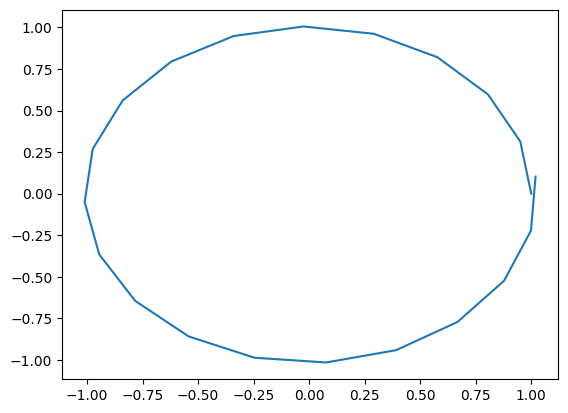

In [331]:
Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])

plt.plot(Re2,Im2)

In [332]:
def ComplexEuler3():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f + 0.5*h_*k1)
    k3 = fc(f + 0.5*h_*k2)
    k4 = fc(f + h_*k3)
    
    f += (h_/6)*(k1 + 2*k2 + 2*k3 + k4)


In [333]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion3 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])

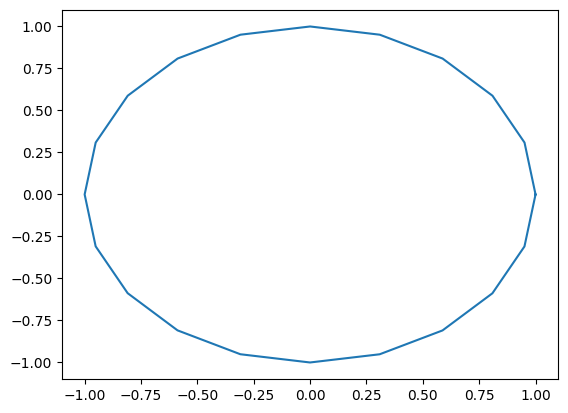

In [334]:
Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])

plt.plot(Re3,Im3)

In [335]:
def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f + 0.5*h_*k1)
    k3 = fc(f + 0.5*h_*k2)
    k4 = fc(f + h_*k3)
    
    f += (h_/6)*(k1 + 2*k2 + 2*k3 + k4)


In [336]:
theta = 0.

N = 20
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion4 = np.array([theta,f])

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f])])

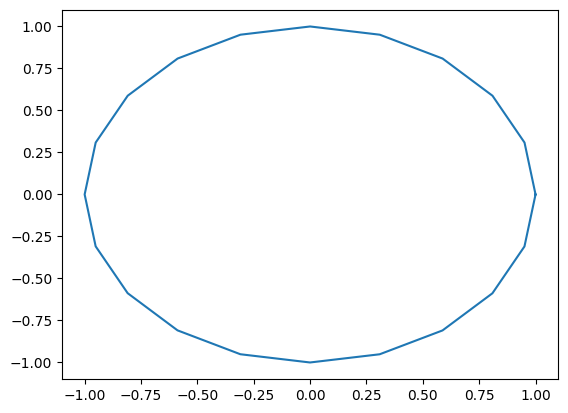

In [337]:
Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])

plt.plot(Re3,Im3)

De las anteriores graficas podemos ver claramente como RungeKutta 3 y 4 son bastante estables.